OBJECTIVE:

The primary goal of this project is to predict the median housing prices in California based on socio-economic and geographical data using advanced machine learning models. The dataset provides insights into various factors influencing housing prices, and the analysis aims to offer actionable predictions and insights for potential stakeholders.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing California Housing Prices Dataset

from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


                                                            Data Preprocessing

In [4]:
df=housing.copy()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_bedrooms contains 207 missing value we have to impute them before training machine learning model

In [8]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
sns.pairplot(housing)
plt.show()

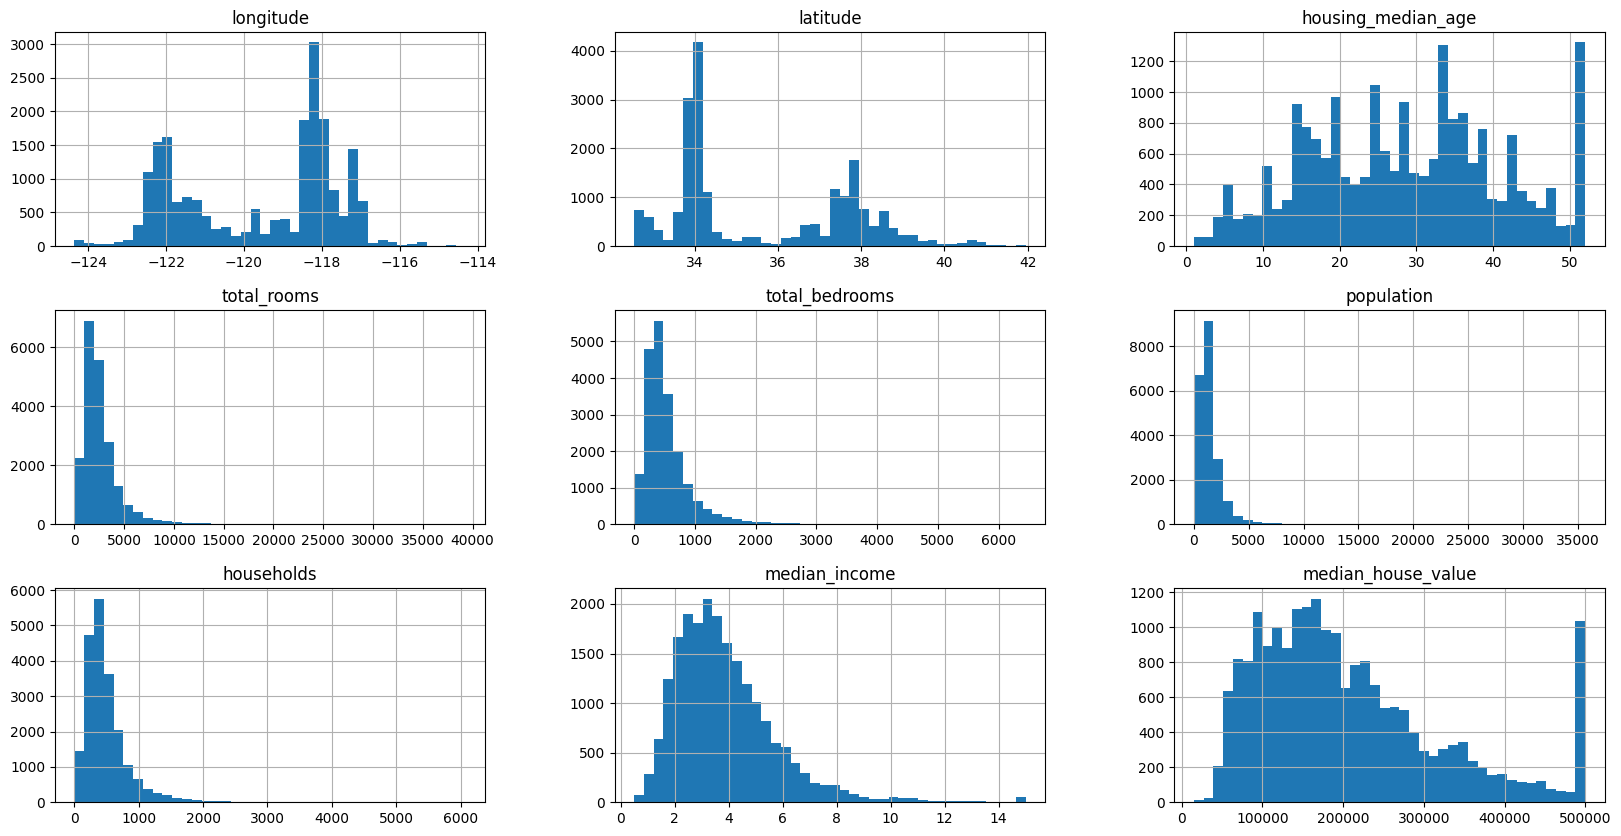

In [10]:

%matplotlib inline
housing.hist(bins=40,figsize=(20,10))
plt.show()

total_rooms,total_bedrooms and household are right tailed data to make them normal distributed we can apply  natural log transformation or log base 10 transformation on them 

median_house_age has almost normal distribution and normal_house_value is little bit right tailed where we can apply natural log to make it normal distributed 

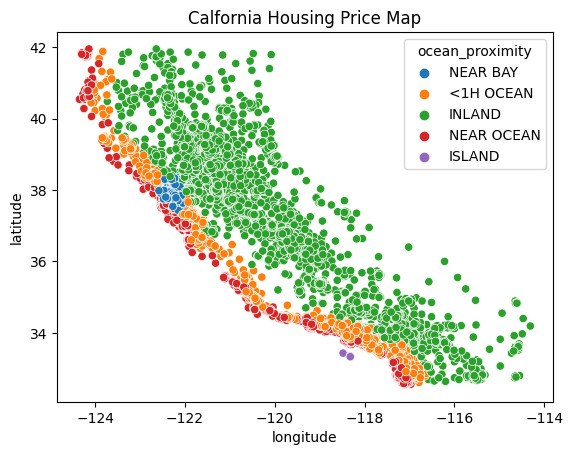

In [11]:
# let's see how actual calfornia dataset looks like 
sns.scatterplot(x=housing.longitude,y=housing.latitude,hue=housing['ocean_proximity'])
plt.title('Calfornia Housing Price Map')
plt.show()

In [12]:
# checking the correlation between different features
corr=housing.drop(columns=['ocean_proximity']).corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


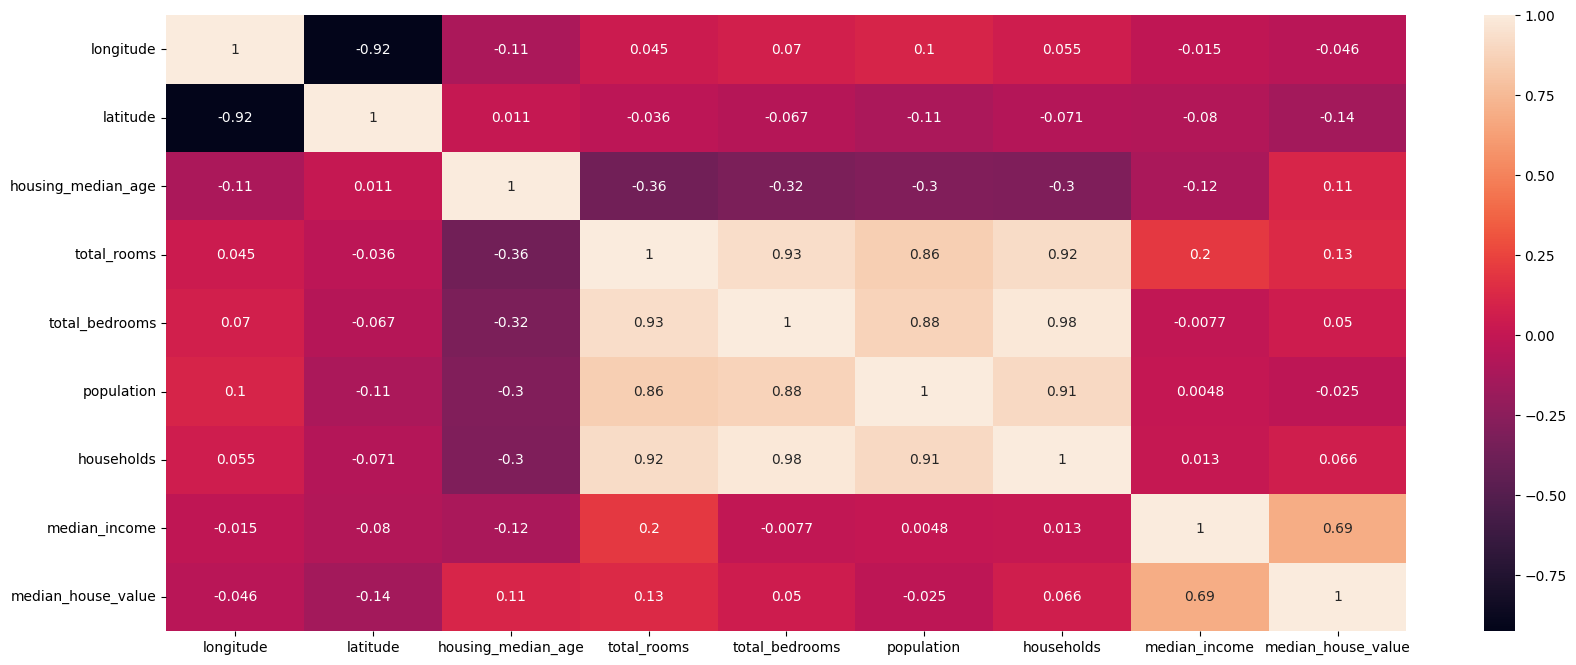

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.show()

From above visualization we can conclude that some features are heighly correlated with each other which cause multicollinarity and as we know some machine learning algorithms doesn't work well with multicollinarity.

In [14]:
# To get rid of multicollinearity we try some new features in our dataset 

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [15]:
corr1=housing.drop(columns=['ocean_proximity']).corr()
corr1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


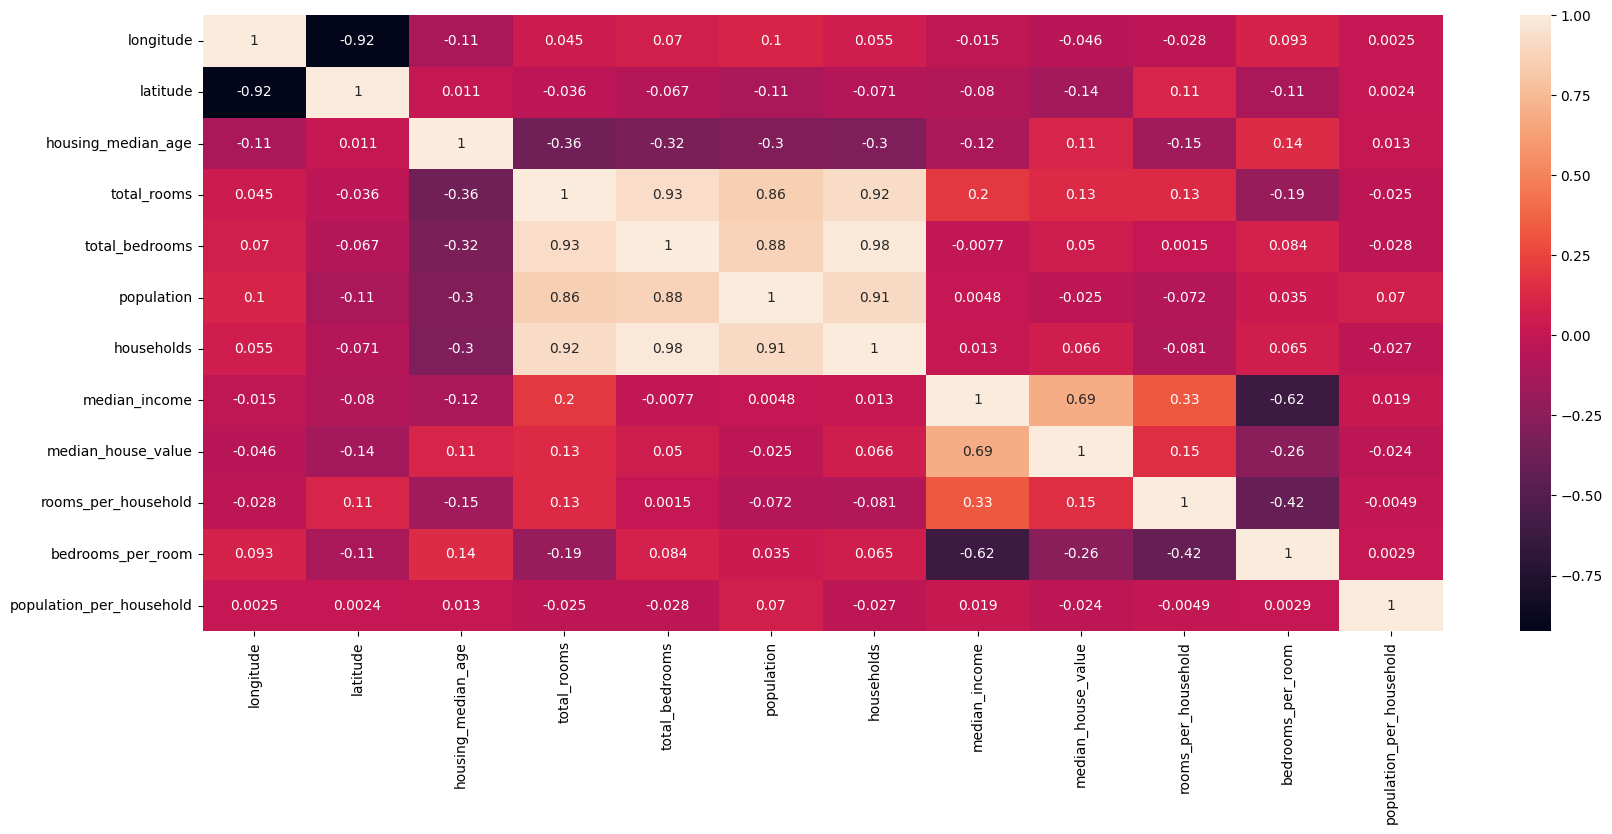

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(corr1,annot=True)
plt.show()

Now we can drop these columns from housing and Let's go to next step where we make our dataset fully ready to feed into machine learning algorithm

In [17]:
housing.drop(columns=['total_rooms','total_bedrooms','population','households'],inplace=True)

In [18]:
housing.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [19]:
housing[housing['median_house_value']>=500000]

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
89,-122.27,37.80,52.0,1.2434,500001.0,NEAR BAY,2.929412,0.313253,4.658824
103,-118.47,33.99,24.0,2.9750,500001.0,<1H OCEAN,3.456731,0.315716,1.598558
105,-118.50,33.97,29.0,5.1280,500001.0,<1H OCEAN,3.932471,0.295214,1.662356
107,-118.39,34.08,27.0,3.8088,500001.0,<1H OCEAN,4.345395,0.258895,1.753289
132,-122.34,37.55,44.0,6.9533,500001.0,NEAR OCEAN,7.608025,0.133063,2.601852
...,...,...,...,...,...,...,...,...,...
20494,-118.12,34.13,52.0,11.7060,500001.0,<1H OCEAN,8.975535,0.116184,2.981651
20500,-121.93,37.66,24.0,8.3337,500001.0,<1H OCEAN,7.915000,0.133923,2.702500
20511,-122.05,37.31,25.0,9.2298,500001.0,<1H OCEAN,7.237676,0.130868,2.790493
20515,-117.36,33.17,24.0,2.3182,500001.0,NEAR OCEAN,5.574932,0.216031,2.212534


Capped values: 965 out of 20640 (4.68%)


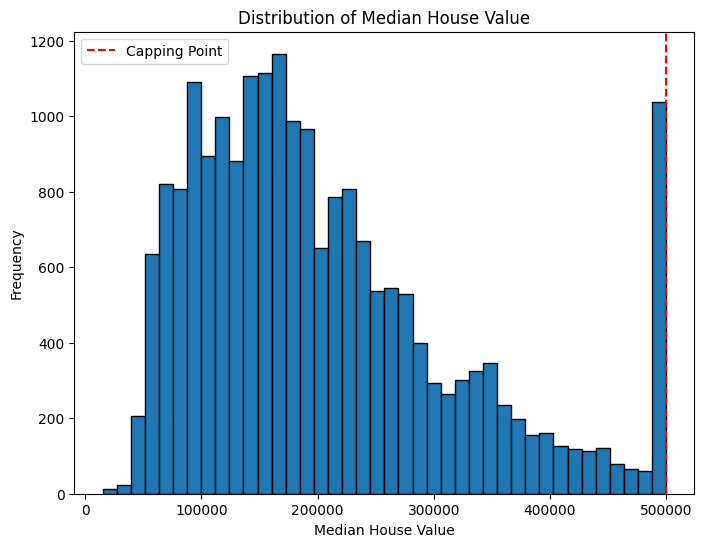

In [20]:

capped_values = housing[housing['median_house_value'] >= 500001]
print(f"Capped values: {len(capped_values)} out of {len(housing)} ({len(capped_values)/len(housing)*100:.2f}%)")


plt.figure(figsize=(8, 6))
plt.hist(housing['median_house_value'], bins=40, edgecolor='black')
plt.axvline(x=500001, color='r', linestyle='--', label='Capping Point')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.legend()
plt.show()


In [21]:
housing.shape


(20640, 9)

In [22]:
housing=housing.sample(20640)
housing=housing.sample(20640)
housing=housing.sample(20640)
housing=housing.sample(20640)

# If you are curious to know why i do this let me explain, I do this to make data more random so during train test spilt data spreed properly into x_train,x_test 

In [23]:
housing

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
1315,-118.35,34.17,44.0,3.5583,232000.0,<1H OCEAN,4.512281,0.238336,2.245614
12722,-121.43,37.75,41.0,2.7500,127300.0,INLAND,5.666667,0.189284,2.821782
13768,-118.17,34.02,41.0,2.3077,140600.0,<1H OCEAN,3.396985,0.319527,4.276382
6796,-119.29,34.24,27.0,6.1940,500001.0,NEAR OCEAN,6.813218,0.163433,2.416667
5283,-117.69,33.51,4.0,4.6607,173000.0,<1H OCEAN,5.012295,0.224857,2.069672
...,...,...,...,...,...,...,...,...,...
16293,-118.42,34.00,14.0,3.1603,287500.0,<1H OCEAN,3.855828,0.312914,2.407975
6539,-119.98,36.86,31.0,3.0234,65000.0,INLAND,5.464203,0.203719,4.464203
4789,-118.28,33.80,38.0,4.0000,165500.0,<1H OCEAN,4.391045,0.223657,3.602985
1999,-117.48,34.08,17.0,3.1028,106400.0,INLAND,5.137255,0.212650,3.509804


In [24]:
housing.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion

In [26]:
x_train,x_test,y_train,y_test=train_test_split(housing.drop(columns=['median_house_value']),housing['median_house_value'],test_size=0.20,random_state=42)

In [27]:
x_train.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4834,-117.92,33.90,13.0,6.3489,<1H OCEAN,5.795527,0.176406,3.226837
5307,-118.24,33.98,37.0,2.1250,<1H OCEAN,3.657492,0.304348,4.960245
19795,-122.62,38.24,19.0,6.2040,<1H OCEAN,6.564202,0.149970,3.474708
18275,-118.43,34.21,17.0,2.4250,<1H OCEAN,3.479127,0.329697,2.500949
6804,-122.20,37.77,43.0,2.8980,NEAR BAY,5.020661,0.206584,3.175620


In [28]:
x_test.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
5323,-122.69,38.34,12.0,4.0844,<1H OCEAN,5.073298,0.201754,2.808901
1730,-117.77,33.53,32.0,5.1837,<1H OCEAN,5.738490,0.212131,2.034991
9397,-118.09,34.74,34.0,2.4348,INLAND,4.911290,0.233990,3.213710
7352,-120.44,34.94,29.0,1.6875,<1H OCEAN,3.815041,0.274907,3.321138
12778,-117.87,33.74,31.0,2.6734,<1H OCEAN,3.705230,0.278871,5.212361


In [29]:
x_test['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     1825
INLAND        1275
NEAR OCEAN     539
NEAR BAY       488
ISLAND           1
Name: count, dtype: int64

In [30]:
num_attribute=list(housing.drop(columns=['ocean_proximity','median_house_value']))

In [31]:
num_attribute

['longitude',
 'latitude',
 'housing_median_age',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [32]:
cat_attribute=['ocean_proximity']


In [33]:

pipeline1=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())
    
],verbose=True)

In [34]:

pipeline2=Pipeline(steps=[
    ('Label Encoder',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'))
])

In [35]:
preprocessor=ColumnTransformer(transformers=[
    ('Pipeline 1 For Numerical Columns ',pipeline1,num_attribute),
    ('Encoder For Cateogrical Columns',pipeline2,cat_attribute)
])

In [36]:
preprocessor

ColumnTransformer(transformers=[('Pipeline 1 For Numerical Columns ',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())],
                                          verbose=True),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'median_income', 'rooms_per_household',
                                  'bedrooms_per_room',
                                  'population_per_household']),
                                ('Encoder For Cateogrical Columns',
                                 Pipeline(steps=[('Label Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [37]:
x_train.shape

(16512, 8)

In [38]:
x_train_transformed=preprocessor.fit_transform(x_train)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


In [39]:
x_train_transformed.shape

(16512, 11)

In [40]:
x_test.shape

(4128, 8)

In [41]:
x_test_transformed=preprocessor.fit_transform(x_test)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


In [42]:
x_test_transformed.shape

(4128, 11)

In [43]:
x_test['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     1825
INLAND        1275
NEAR OCEAN     539
NEAR BAY       488
ISLAND           1
Name: count, dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, explained_variance_score





                                                    First Model as Linear Regression



In [45]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [46]:
y_pred_lr=lr.predict(x_test_transformed)

In [47]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_lr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_lr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score',r2_score(y_test,y_pred_lr))
print('Variance Score',explained_variance_score(y_test,y_pred_lr))


Percentage Error 0.28632756497408135
Mean Square Error 4852204002.379817
RMSE 69657.76340351316
R2 Score 0.6343500430790934
Variance Score 0.6346364435724996


In [48]:
cv_score_lr=cross_val_score(lr,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')


In [49]:
rmse_lr=np.sqrt(-cv_score_lr)
print('CV Scores',rmse_lr)
print('RMSE',rmse_lr.mean())

CV Scores [71298.13537589 74032.4528905  70639.75706481 72553.697394
 73566.99208977 69253.01285154 72527.15125168 71151.58552359
 68060.19342747 71278.98500347]
RMSE 71436.1962872727


Conclusion : LinearRegression Model doesn't perform well it goes Underfitting and it fail to learn the pattern cause it give us 27% of mean_absolute_percentage_error and RMSE as 70804 after doing 10 Cross validation and its r2 score is 0.63.


                                          Second Model as RandomForestRegressor
                                          

In [50]:
rfr=RandomForestRegressor(n_estimators=100,max_features=8)

In [51]:
rfr.fit(x_train_transformed,y_train)

RandomForestRegressor(max_features=8)

In [52]:
y_pred_rfr=rfr.predict(x_test_transformed)

In [53]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_rfr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_rfr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_rfr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score',r2_score(y_test,y_pred_rfr))
print('Variance Score',explained_variance_score(y_test,y_pred_rfr))


Percentage Error 0.1872838126805324
Mean Square Error 2665885566.7569747
RMSE 69657.76340351316
R2 Score 0.799105531803143
Variance Score 0.799106304240545


In [54]:
# This line of Code take some time to run

cv_score_rfr=cross_val_score(rfr,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')


In [55]:
rmse_rfr=np.sqrt(-cv_score_rfr)
print('CV Scores',rmse_rfr)
print('RMSE',rmse_rfr.mean())

CV Scores [48767.1084052  47681.10455051 46799.03308919 52351.95633686
 51357.96841001 47800.5983272  49929.70948599 50015.62482684
 46020.99932794 49158.01885978]
RMSE 48988.21216195198


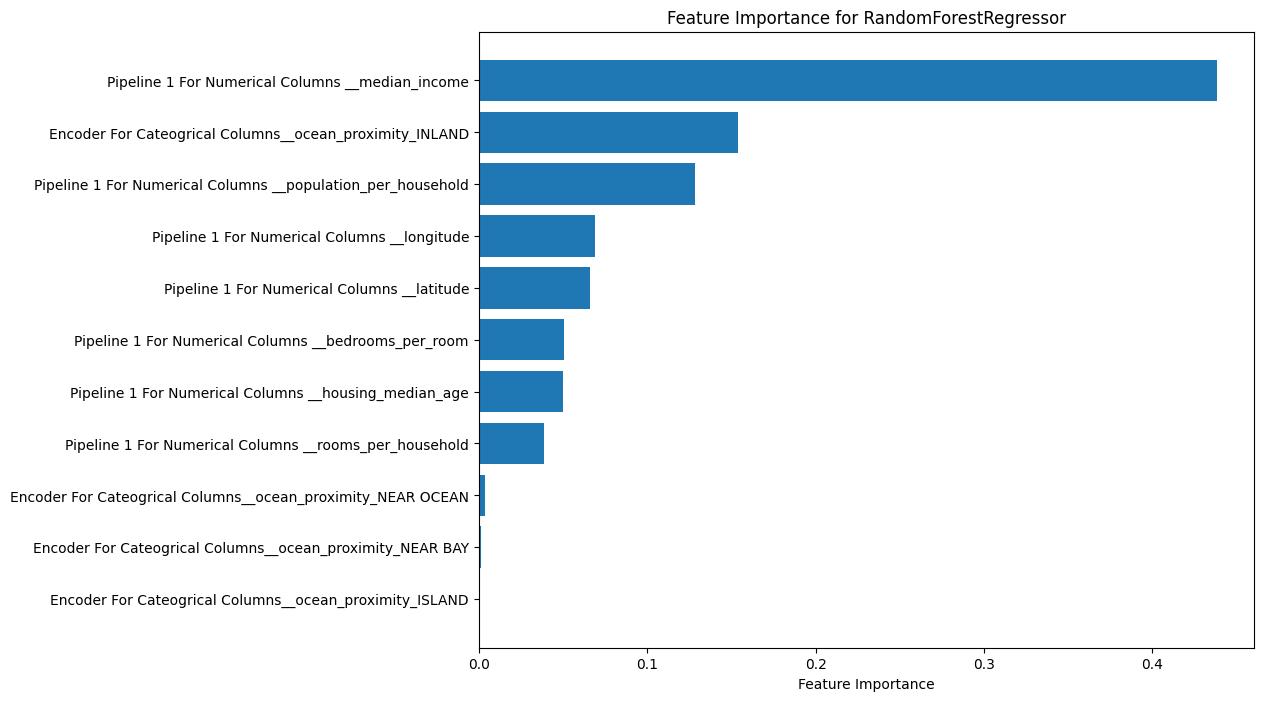

In [56]:
importances = rfr.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()


Random forest Regressor perform well than Linear regression and it give us RMSE of 48094 which is less than of Linear regression.we confirm it by doing cross validation and well R2 score is 0.81 but explained_variance_score is 0.81

After doing Cross validation we can confirm that RandomForesetRegressor perform better than Linear regressor 

                                                 Thrid Model as SVM

In [57]:

svr=SVR(kernel='linear')

In [58]:
svr.fit(x_train_transformed,y_train)

SVR(kernel='linear')

In [59]:
y_pred_svr=svr.predict(x_test_transformed)

In [60]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_svr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_svr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_svr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

print('R2 Score',r2_score(y_test,y_pred_svr))
print('Variance Score',explained_variance_score(y_test,y_pred_svr))


Percentage Error 0.476369720873168
Mean Square Error 12415465442.870937
RMSE 111424.70750632885
R2 Score 0.06440157872335739
Variance Score 0.12802289129444122


SVM perfrom more worst than Linear Regressor


                                                    Fourth Model as XGboost 


In [61]:
from xgboost import XGBRegressor 
xgb=XGBRegressor()
xgb.fit(x_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_pred=xgb.predict(x_test_transformed)
xgb_pred

array([213033.81, 429302.47,  92649.21, ..., 163984.52, 160507.75,
       205799.45], dtype=float32)

In [63]:

print('Percentage Error',mean_absolute_percentage_error(y_test,xgb_pred))
print('Mean Square Error',mean_squared_error(y_test,xgb_pred))
#print('RMSE',root_mean_squared_error(y_test,xgb_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,xgb_pred)))

print('R2 Score',r2_score(y_test,xgb_pred))
print('Variance Score',explained_variance_score(y_test,xgb_pred))


Percentage Error 0.18977423439884458
Mean Square Error 2705537469.1323156
RMSE 52014.78125621904
R2 Score 0.7961174636204646
Variance Score 0.7961174738974688


In [64]:
cv_score_xgb=cross_val_score(xgb,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')


In [65]:
rmse_xgb=np.sqrt(-cv_score_xgb)
print('CV Scores',rmse_xgb)
print('RMSE',rmse_xgb.mean())

CV Scores [45380.4437577  44661.39057582 44360.69801809 50011.66219707
 47754.24249284 44086.21077508 48058.31921854 47530.91720441
 44681.71306721 44693.6856072 ]
RMSE 46121.9282913961


Xgboost give us better result than any other algorithms which we use before even it is better than RandomForest Regressor.Xgboost give almost 45943 RMSE with 17% of mean_absolute_percentage_error and its R2 score is about 0.82 with explained Variance score of 0.82 so we choose our final model as  XGboost and try to find best parameter for it these above result are best case scenario

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameter=[{'n_estimators':[60,80,100,50],'max_depth':[None,5,10,15],'booster':['gbtree','dart']}]

In [68]:

grid_cv=GridSearchCV(estimator=xgb,param_grid=parameter,cv=10,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error')

In [69]:
grid_cv.fit(x_train_transformed,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'max_depth': [None, 5, 10, 15],
                          'n_estimators': [60, 80, 100, 50]}],
             scoring='neg_mean_squared_error', verbose=3)

In [70]:
grid_cv.best_params_

{'booster': 'dart', 'max_depth': None, 'n_estimators': 100}

In [71]:
print('Best RMSE Score',np.sqrt(-grid_cv.best_score_))

Best RMSE Score 46162.641472766154


In [72]:
XGB_Model=grid_cv.best_estimator_

In [73]:
XGB_Model

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
XGB_Model.feature_importances_

array([0.02587826, 0.02623874, 0.02405771, 0.2230559 , 0.01201781,
       0.01092772, 0.05191162, 0.5828871 , 0.        , 0.01697223,
       0.02605283], dtype=float32)

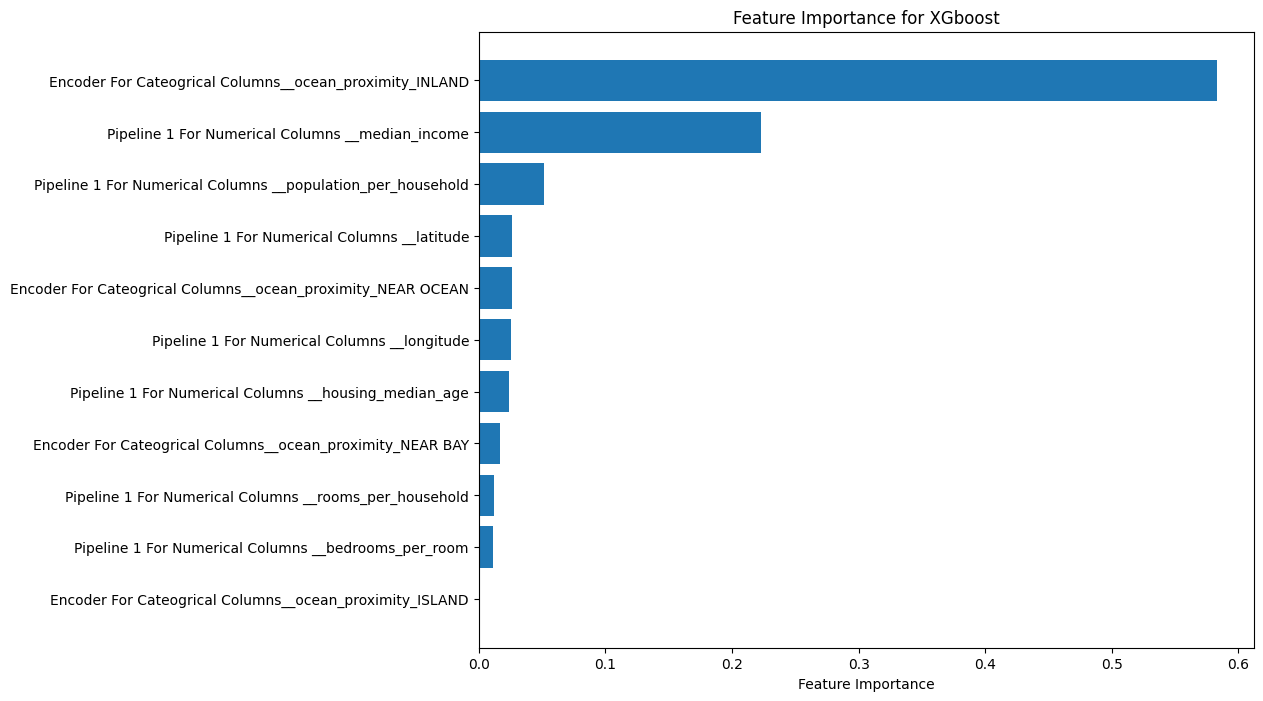

In [75]:
importances = XGB_Model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGboost')
plt.show()


In [76]:
XGB_Model.fit(x_train_transformed,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
new_y_pred_XGB=XGB_Model.predict(x_test_transformed)

In [78]:
print('Percentage Error',mean_absolute_percentage_error(y_test,new_y_pred_XGB))
print('Mean Square Error',mean_squared_error(y_test,new_y_pred_XGB))
#print('RMSE',root_mean_squared_error(y_test,new_y_pred_XGB))
print("RMSE",np.sqrt(mean_squared_error(y_test,new_y_pred_XGB)))

print('R2 Score',r2_score(y_test,new_y_pred_XGB))
print('Variance Score',explained_variance_score(y_test,new_y_pred_XGB))


Percentage Error 0.18977424211318428
Mean Square Error 2705537527.8802776
RMSE 52014.781820942764
R2 Score 0.7961174591933652
Variance Score 0.7961174694594583


In [79]:
cv_score_xgb_model=cross_val_score(XGB_Model,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')


In [80]:
rmse_xgb_model=np.sqrt(-cv_score_xgb_model)
print('CV Scores',rmse_xgb_model)
print('RMSE',rmse_xgb_model.mean())

CV Scores [45380.44605431 44661.38779352 44360.69688844 50011.66689797
 47754.24078531 44086.20794953 48058.31773396 47530.91526176
 44681.7095424  44693.68812637]
RMSE 46121.92770335759


After doing GridSearchCV we find out best estimators we are able to get the best result which we can get by reducing mean_absolute_percenatge_error to 17% and  final RMSE approx to 46419 with r2 score of 0.82 and also explained varwhich is better than any other model which we used before


In [81]:
Final_Model=Pipeline(steps=[
    ('Pre Processing',preprocessor),
    ('Random Forest Regressor',XGB_Model)
])

In [82]:
Final_Model

Pipeline(steps=[('Pre Processing',
                 ColumnTransformer(transformers=[('Pipeline 1 For Numerical '
                                                  'Columns ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())],
                                                           verbose=True),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                                                 ('Encoder For Cat...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [83]:
Final_Model.fit(x_train,y_train)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


Pipeline(steps=[('Pre Processing',
                 ColumnTransformer(transformers=[('Pipeline 1 For Numerical '
                                                  'Columns ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())],
                                                           verbose=True),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                                                 ('Encoder For Cat...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [84]:
Final_pred_using_xgb=Final_Model.predict(x_test)

In [86]:

print('Final Model RMSE ',np.sqrt(mean_squared_error(y_test,Final_pred_using_xgb)))

Final Model RMSE  46244.06814511198


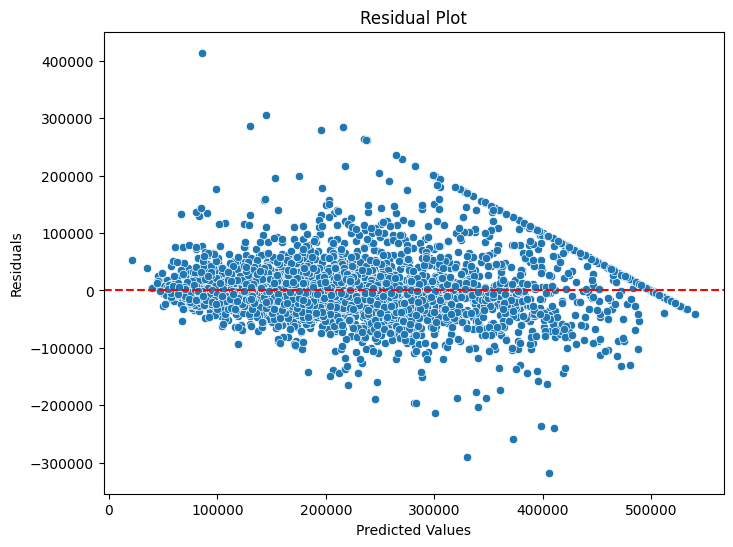

In [87]:

residuals = y_test - Final_pred_using_xgb
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Final_pred_using_xgb, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


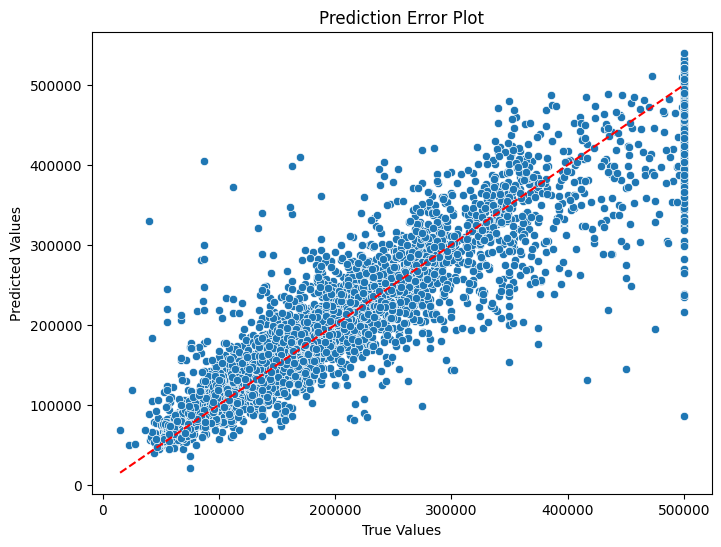

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=Final_pred_using_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.show()


In [89]:

import pickle

In [90]:
with open('Final Model For California Housing Price','wb') as f:
    pickle.dump(Final_Model,f)

In [91]:
with open('Final Model For California Housing Price','rb') as a:
    model=pickle.load(a)

In [92]:

model.predict(pd.DataFrame(np.array([-117.28,32.74,33.0,2.7515,'NEAR OCEAN',4.235772,0.266795,1.814024]).reshape(1,8),columns=housing.drop(columns=['median_house_value']).columns))

array([264795.5], dtype=float32)

Results and Outcomes

Prediction Accuracy: RMSE of ~46,000 and R² score of 0.82.

Insights:

Significant variables influencing housing prices.

Addressed data challenges like missing values and multicollinearity.

Deliverables:

A deployable XGBoost model.

Comprehensive visualizations and analysis.